In [316]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)
pd.options.display.float_format = '{:,.2f}'.format

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import warnings

In [317]:
def layoutHist(df, lx, ly):
  
    df = df[0]
    for x in df:

        # Despine
        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        # Switch off ticks
        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

        # Draw horizontal axis lines
        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        # Remove title
        x.set_title("")

        # Set x-axis label
        x.set_xlabel(lx, labelpad=20, weight='bold', size=12)

        # Set y-axis label
        x.set_ylabel(ly, labelpad=20, weight='bold', size=12)

        # Format y-axis label
        x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
        

def detalharDataset(df):
    print("\nDimensões:\n{0}".format(df.shape))
    print("\nCampos:\n{0}".format(list(df.keys())))
    print("\nTipos dos dados:\n{0}\n".format(df.dtypes))
    print(df.describe())
    print(df.head(20))


def resumoDataset(df):
    info = pd.DataFrame({
        'Único':df.nunique(),
        'Null':df.isna().sum(),
        'Tipo':df.dtypes.values
    })
    print('Dataset (linhas, colunas):',df.shape)
    print('Dados Duplicados:',df.duplicated().sum())
    display(info)


#Exibe valores únicos
def qtdCampo(campo):
    u = dataset[campo].unique()
    for i in u:
        print(i,' ', dataset[dataset[campo] == i].shape[0])
        
 

In [318]:
#https://www.kaggle.com/datasets/sukhmandeepsinghbrar/heart-attack-dataset/data?select=Medicaldataset.csv
dataset = pd.read_csv('dataset/medicaldataset.csv')

#dataset = dataset.drop_duplicates()

#Renomear os nomes das colunas
rename = ['Idade', 'Gênero', 'Batimentos', 'Pres Sist', 'Pres Diast', 'Glicose', 'CK-MB', 'Troponina', 'Resultado']
dataset.columns = rename

#Renomear os valores de Resultado
dataset.loc[dataset['Resultado'] == 'positive', 'Resultado'] = "POSITIVO"
dataset.loc[dataset['Resultado'] == 'negative', 'Resultado'] = "NEGATIVO"


In [319]:
detalharDataset(dataset)


Dimensões:
(1319, 9)

Campos:
['Idade', 'Gênero', 'Batimentos', 'Pres Sist', 'Pres Diast', 'Glicose', 'CK-MB', 'Troponina', 'Resultado']

Tipos dos dados:
Idade           int64
Gênero          int64
Batimentos      int64
Pres Sist       int64
Pres Diast      int64
Glicose       float64
CK-MB         float64
Troponina     float64
Resultado      object
dtype: object

         Idade   Gênero  Batimentos  Pres Sist  Pres Diast  Glicose    CK-MB  \
count 1,319.00 1,319.00    1,319.00   1,319.00    1,319.00 1,319.00 1,319.00   
mean     56.19     0.66       78.34     127.17       72.27   146.63    15.27   
std      13.64     0.47       51.63      26.12       14.03    74.92    46.33   
min      14.00     0.00       20.00      42.00       38.00    35.00     0.32   
25%      47.00     0.00       64.00     110.00       62.00    98.00     1.65   
50%      58.00     1.00       74.00     124.00       72.00   116.00     2.85   
75%      65.00     1.00       85.00     143.00       81.00   169.50    

In [320]:
resumoDataset(dataset)

Dataset (linhas, colunas): (1319, 9)
Dados Duplicados: 0


,Único,Null,Tipo
Idade,75,0,int64
Gênero,2,0,int64
Batimentos,79,0,int64
Pres Sist,116,0,int64
Pres Diast,73,0,int64
Glicose,244,0,float64
CK-MB,700,0,float64
Troponina,352,0,float64
Resultado,2,0,object


,Idade,Gênero,Batimentos,Pres Sist,Pres Diast,Glicose,CK-MB,Troponina
count,449.00,449.00,449.00,449.00,449.00,449.00,449.00,449.00
mean,57.97,0.00,80.26,126.77,72.45,145.94,14.14,0.26
std,14.20,0.00,70.51,26.62,13.81,73.65,42.89,1.03
min,14.00,0.00,20.00,67.00,40.00,50.00,0.32,0.00
25%,49.00,0.00,64.00,109.00,62.00,97.00,1.64,0.01
50%,60.00,0.00,75.00,124.00,71.00,116.00,2.65,0.01
75%,70.00,0.00,85.00,142.00,80.00,170.00,5.58,0.04
max,103.00,0.00,"1,111.00",223.00,128.00,500.00,300.00,10.00


Mulher
 None


,Idade,Gênero,Batimentos,Pres Sist,Pres Diast,Glicose,CK-MB,Troponina
count,870.00,870.00,870.00,870.00,870.00,870.00,870.00,870.00
mean,55.28,1.00,77.34,127.38,72.17,146.99,15.86,0.42
std,13.26,0.00,38.43,25.87,14.16,75.61,48.02,1.21
min,19.00,1.00,20.00,42.00,38.00,35.00,0.34,0.00
25%,47.00,1.00,64.00,110.00,61.00,98.00,1.67,0.01
50%,56.00,1.00,74.00,124.00,72.00,116.00,2.92,0.02
75%,65.00,1.00,85.00,144.00,81.00,169.00,5.87,0.15
max,100.00,1.00,"1,111.00",223.00,154.00,541.00,300.00,10.30


Homem
 None


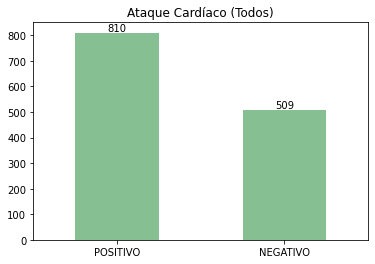

In [321]:
def graficoBar(df, t):
    ax = df.plot.bar(color='#86bf91', rot = 0, title = t)
    ax.bar_label(ax.containers[0])

#Gráfico resultado ods ataques cardíacos
dfHomem  = dataset.where(dataset["Gênero"] == 1).dropna()
dfMulher = dataset.where(dataset["Gênero"] == 0).dropna()

print('Mulher\n', display(dfMulher.describe()))

print('Homem\n', display(dfHomem.describe()))

df = dataset['Resultado'].value_counts()
graficoBar(df, 'Ataque Cardíaco (Todos)')

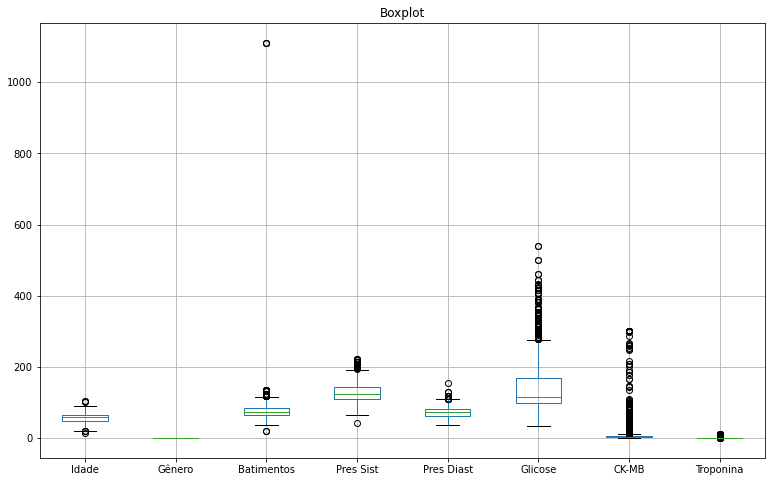

In [227]:
#Procurar por outliers
plt.figure(figsize=(13,8))
dataset.boxplot()
plt.title('Boxplot')
plt.xticks()
plt.show()

In [322]:
#encontrado na Taxa de Batimentos com valor 1111 (consideremos erro de digitação, susbtituindo por 111)
dataset['Batimentos'] = dataset['Batimentos'].replace(1111, 111)
#dataset['Taxa de batimentos'].describe()

       Idade  Gênero  Batimentos  Pres Sist  Pres Diast  Glicose  CK-MB  \
count 563.00  563.00      563.00     563.00      563.00   563.00 563.00   
mean   57.64    1.00       78.24     127.07       72.16   142.53  23.06   
std    12.65    0.00       46.45      25.02       13.83    70.66  58.46   
min    20.00    1.00       36.00      65.00       38.00    35.00   0.35   
25%    50.00    1.00       63.00     110.00       62.00    98.00   1.84   
50%    60.00    1.00       74.00     123.00       72.00   115.00   3.58   
75%    65.50    1.00       87.00     140.50       80.00   162.50  11.34   
max   100.00    1.00    1,111.00     223.00      154.00   541.00 300.00   

       Troponina  
count     563.00  
mean        0.62  
std         1.41  
min         0.00  
25%         0.02  
50%         0.05  
75%         0.64  
max        10.30  
Dataset (linhas, colunas): (1319, 8)
Dados Duplicados: 0


,Único,Null,Tipo
Idade,75,0,int64
Gênero,2,0,int64
Batimentos,78,0,int64
Pres Sist,116,0,int64
Pres Diast,73,0,int64
Glicose,244,0,float64
CK-MB,700,0,float64
Troponina,352,0,float64


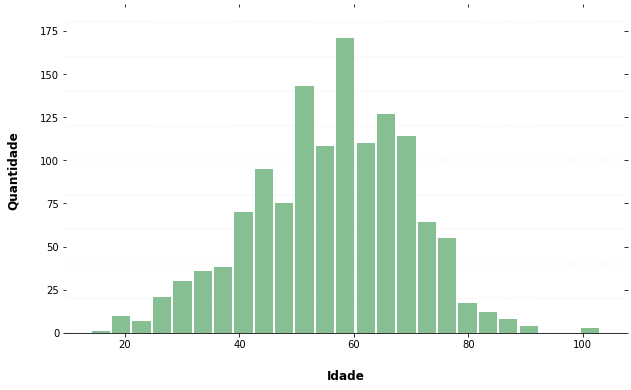

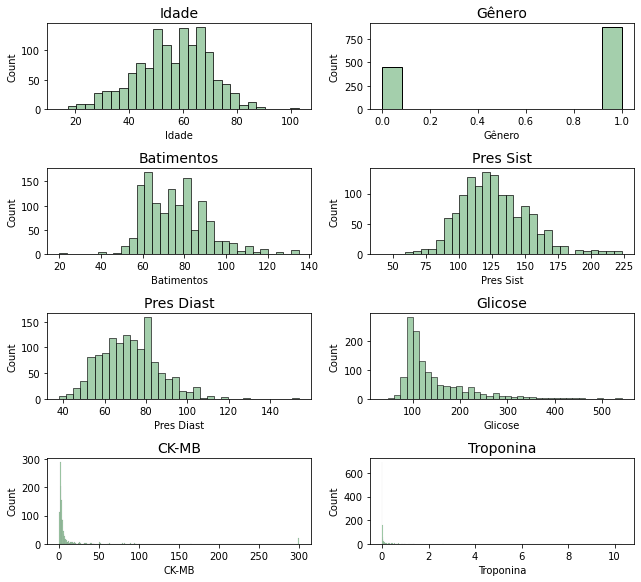

In [323]:
#Histograma
def graficoHist(df, x, y):
    df = df.hist(column=x, figsize=(10,6), bins=25, grid=False, color='#86bf91', zorder=2, rwidth=0.9)
    layoutHist(df, x, y)
    


dfHomemPositivo = dfHomem.where(dataset["Resultado"] == 'POSITIVO').dropna()
dfMulherPositivo = dfMulher.where(dataset["Resultado"] == 'POSITIVO').dropna()
#resumoDataset(dfHomem)

print(dfHomemPositivo.describe())

graficoHist(dataset, 'Idade', 'Quantidade')


df = dataset.select_dtypes(exclude='O')
resumoDataset(df)

#histograma da lista de keys

#num = df.select_dtypes(exclude='O')

## gráfico de histograma
num = df
num.shape

plt.figure(figsize=(9,50))
for i, col in enumerate(num.keys()):
        ax = plt.subplot(25, 2, i+1)
        sns.histplot(num[col], ax=ax, color='#86bf91')
        plt.title(col, fontsize=14)
plt.tight_layout()        
plt.show()


,Idade,Gênero,Batimentos,Pres Sist,Pres Diast,Glicose,CK-MB,Troponina
Idade,1.00,-0.09,-0.00,0.02,0.00,-0.00,0.02,0.09
Gênero,-0.09,1.00,0.01,0.01,-0.01,0.01,0.02,0.07
Batimentos,-0.00,0.01,1.00,-0.04,0.12,0.01,-0.00,0.04
Pres Sist,0.02,0.01,-0.04,1.00,0.59,0.02,-0.02,0.04
Pres Diast,0.00,-0.01,0.12,0.59,1.00,-0.03,-0.02,0.04
Glicose,-0.00,0.01,0.01,0.02,-0.03,1.00,0.05,0.02
CK-MB,0.02,0.02,-0.00,-0.02,-0.02,0.05,1.00,-0.02
Troponina,0.09,0.07,0.04,0.04,0.04,0.02,-0.02,1.00


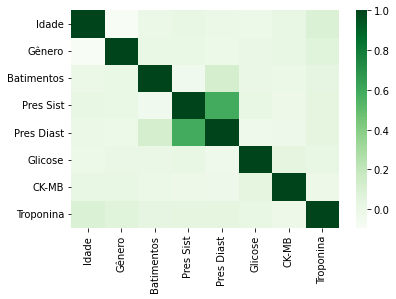

In [324]:
sns.heatmap(dataset.corr(), cmap="Greens")
dataset.corr()

In [292]:
#sns.barplot(x=dataset['Pres Diast'],y=dataset['Resultado'], color = '#86bf91')

In [296]:
#sns.scatterplot(data=dataset,x="Pres Sist",y="Idade",hue="Resultado")
#sns.scatterplot(data=dataset,x="Gênero",y="Idade",hue="Resultado")

In [150]:
#resumoDataset(dataset)

In [325]:
X = dataset.drop(['Resultado'] , axis =1)
y = dataset['Resultado']

In [326]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

resumoDataset(X_train)
resumoDataset(X_test)


Dataset (linhas, colunas): (883, 8)
Dados Duplicados: 0


,Único,Null,Tipo
Idade,74,0,int64
Gênero,2,0,int64
Batimentos,76,0,int64
Pres Sist,113,0,int64
Pres Diast,71,0,int64
Glicose,215,0,float64
CK-MB,532,0,float64
Troponina,257,0,float64


Dataset (linhas, colunas): (436, 8)
Dados Duplicados: 0


,Único,Null,Tipo
Idade,61,0,int64
Gênero,2,0,int64
Batimentos,62,0,int64
Pres Sist,95,0,int64
Pres Diast,58,0,int64
Glicose,165,0,float64
CK-MB,330,0,float64
Troponina,163,0,float64


In [327]:
## Construir os modelos

GaussianNBModel = GaussianNB()

LogisticRegressionModel = LogisticRegression(penalty='l2',solver='sag',C=1.0,random_state=33)

DecisionTreeClassifierModel = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33)

Models = [LogisticRegressionModel,
          GaussianNBModel,
          DecisionTreeClassifierModel]

In [310]:
#print resultados

###########################################


ModelsScore = {}

for Model in Models : 
    print(f'\nModelo {str(Model).split("(")[0]}')
    Model.fit(X_train, y_train)
    
    print(f'\nTrain Score: {Model.score(X_train, y_train)}')
    print(f'Test Score : {Model.score(X_test, y_test)}')
   
    y_pred = Model.predict(X_test)
    ClassificationReport = classification_report(y_test,y_pred)
    
    print('\n', ClassificationReport )
    print(f'Precisão: {ClassificationReport.split()[19]}')
    print(f'Recall  : {ClassificationReport.split()[20]}')
    print(f'F1 Score: {ClassificationReport.split()[21]}')
    
    ModelsScore[str(Model).split("(")[0]] = [ClassificationReport.split()[19],
                                             ClassificationReport.split()[20],ClassificationReport.split()[21]]
    print('\n*********************************************************\n')   


Modelo LogisticRegression

Train Score: 0.7270668176670442
Test Score : 0.6926605504587156

               precision    recall  f1-score   support

    NEGATIVO       0.63      0.49      0.55       168
    POSITIVO       0.72      0.82      0.77       268

    accuracy                           0.69       436
   macro avg       0.67      0.65      0.66       436
weighted avg       0.68      0.69      0.68       436

Precisão: 0.67
Recall  : 0.65
F1 Score: 0.66

*********************************************************


Modelo GaussianNB

Train Score: 0.782559456398641
Test Score : 0.768348623853211

               precision    recall  f1-score   support

    NEGATIVO       0.63      0.99      0.77       168
    POSITIVO       0.99      0.63      0.77       268

    accuracy                           0.77       436
   macro avg       0.81      0.81      0.77       436
weighted avg       0.85      0.77      0.77       436

Precisão: 0.81
Recall  : 0.81
F1 Score: 0.77

*****************

/Users/prcgomes/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [328]:

modelos = {
    'Logistic Regression': LogisticRegression(random_state=33),
    'Decision Tree': DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=33),
    'Gaussian NB': GaussianNB()
}

# Treinando os modelos e apresentando os resultados
for nome, m in modelos.items():
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    print(f"\n{nome} Resultados:")
    print(classification_report(y_test, y_pred))
    


Logistic Regression Resultados:
              precision    recall  f1-score   support

    NEGATIVO       0.72      0.73      0.73       168
    POSITIVO       0.83      0.82      0.83       268

    accuracy                           0.79       436
   macro avg       0.77      0.78      0.78       436
weighted avg       0.79      0.79      0.79       436


Decision Tree Resultados:
              precision    recall  f1-score   support

    NEGATIVO       0.98      0.99      0.99       168
    POSITIVO       1.00      0.99      0.99       268

    accuracy                           0.99       436
   macro avg       0.99      0.99      0.99       436
weighted avg       0.99      0.99      0.99       436


Gaussian NB Resultados:
              precision    recall  f1-score   support

    NEGATIVO       0.63      0.99      0.77       168
    POSITIVO       0.99      0.63      0.77       268

    accuracy                           0.77       436
   macro avg       0.81      0.81      0.77

/Users/prcgomes/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'px' is not defined